# Exploratory Data Analysis

This is an EDA of the merged data, combining the following datasets together:
- Clinical
- Biomarker
- MRI
- Questionnaires
- Tomography
- Xray

Following this, the resulting dataset will then merged with progression.csv, removing all data entries which are not present inside the csv file.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle('../data/final/merged_data.pkl.bz2', compression='bz2')

### Statistical Data Understanding

In [5]:
data.columns

Index(['Subject ID', 'BP_DBP_mean', 'BP_HR_mean', 'BP_SBP_mean',
       'Chair_StandUp_Stands', 'Chair_StandUp_Strategy', 'Menopause_Post',
       'Painful_Hip', 'Self_Paced_Walk_Aid', 'Med_His_OA',
       ...
       'OPLaTi_K_LAS', 'OPMeFe_K_LAS', 'OPMeTi_K_LAS', 'SSLaFe_K_LAS',
       'SSLaTi_K_LAS', 'SSMeFe_K_LAS', 'SSMeTi_K_LAS', 'TA_K_LAS', 'S', 'P'],
      dtype='object', length=382)

In [6]:
data.shape

(221, 382)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 382 entries, Subject ID to P
dtypes: Int64(124), category(45), float64(209), int64(4)
memory usage: 619.2 KB


In [8]:
data.describe()

,Subject ID,BP_DBP_mean,BP_HR_mean,BP_SBP_mean,Chair_StandUp_Stands,Menopause_Post,PE_Doyle_Index,BMI,Self_Paced_Walk_Time,CCI,...,KL_Score_K_LAS,KL_Score_K_ML,JSNLa_K_LAS,JSNMe_K_LAS,OPLaFe_K_LAS,OPLaTi_K_LAS,OPMeFe_K_LAS,OPMeTi_K_LAS,S,P
count,2.210000e+02,221.000000,221.000000,221.000000,218.000000,220.0,216.000000,221.000000,221.000000,221.000000,...,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,221.000000,221.000000
mean,1.550925e+12,81.728507,71.796380,136.848416,10.444954,0.5,4.324074,27.719005,27.873303,0.443439,...,1.652968,1.502283,0.246575,0.69863,0.776256,0.936073,0.424658,0.826484,0.185520,0.348416
std,9.002901e+10,11.202518,10.785689,19.509167,2.918114,0.852072,7.982339,4.985907,7.216286,0.799270,...,1.176267,1.089459,0.623268,0.8988,1.06236,1.038491,0.88179,0.849734,0.389602,0.477550
min,1.250180e+12,44.000000,43.000000,96.500000,2.000000,-1.0,0.000000,18.300000,10.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,1.528020e+12,75.000000,64.500000,123.000000,8.000000,0.0,0.000000,24.000000,23.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,1.528020e+12,82.000000,72.000000,135.000000,10.000000,1.0,1.000000,26.700000,27.000000,0.000000,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000
75%,1.528140e+12,88.500000,79.000000,148.000000,12.000000,1.0,6.000000,31.500000,30.000000,1.000000,...,3.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,0.000000,1.000000
max,1.724170e+12,113.000000,101.500000,205.500000,18.000000,1.0,66.000000,44.000000,62.000000,5.000000,...,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.000000,1.000000


### Investigate Data Quality

In [9]:
# Check for missing data
data.isnull().sum()

Subject ID              0
BP_DBP_mean             0
BP_HR_mean              0
BP_SBP_mean             0
Chair_StandUp_Stands    3
                       ..
SSMeFe_K_LAS            2
SSMeTi_K_LAS            2
TA_K_LAS                2
S                       0
P                       0
Length: 382, dtype: int64

In [10]:
# Total number of columns with missing data present
data.isnull().any().sum()

316

In [11]:
# Percentage of missing data
data.isnull().sum() * 100 / len(data)

Subject ID              0.000000
BP_DBP_mean             0.000000
BP_HR_mean              0.000000
BP_SBP_mean             0.000000
Chair_StandUp_Stands    1.357466
                          ...   
SSMeFe_K_LAS            0.904977
SSMeTi_K_LAS            0.904977
TA_K_LAS                0.904977
S                       0.000000
P                       0.000000
Length: 382, dtype: float64

In [12]:
# Calculate the percentage of missing data for each column
missing_percentage = (data.isnull().sum() * 100 / len(data)).round(2)

# Convert to a DataFrame
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Column', 'MissingPercentage']

# Group by the 'MissingPercentage' and count the number of columns in each group
missing_groups = missing_df.groupby('MissingPercentage').count()
missing_groups.columns = ['CountOfColumns']

missing_groups = missing_groups[missing_groups.index > 0]

missing_groups

,CountOfColumns
MissingPercentage,
0.45,1
0.90,13
1.36,1
2.26,1
2.71,105
3.17,23
3.62,1
4.07,1
4.52,2


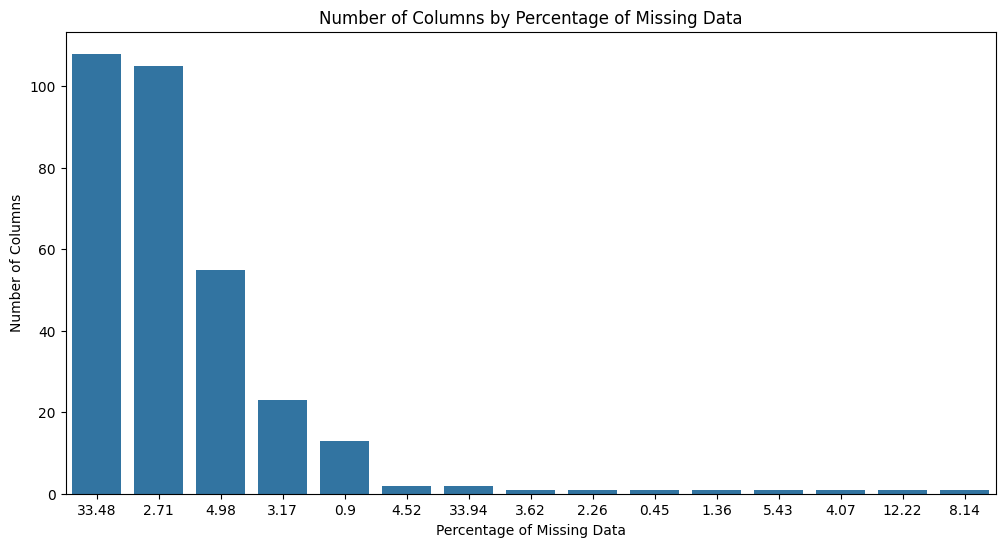

In [18]:
missing_groups.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='MissingPercentage', y='CountOfColumns', data=missing_groups,
            order=missing_groups.sort_values('CountOfColumns', ascending=False)['MissingPercentage'])

plt.title('Number of Columns by Percentage of Missing Data')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Number of Columns')

plt.show()

In [14]:
# Filter columns where the percentage of missing data is greater than 0 and less than 5%
missing_percentage_less_than_5 = missing_percentage[(missing_percentage > 0) & (missing_percentage < 5)].index.tolist()
len(missing_percentage_less_than_5)

203

In [15]:
# Check for duplicated data
data.duplicated().sum()

0

### Multivariant Analysis

In [16]:
# Calculate the correlation matrix
corr_matrix_with_target_var = data.corr()

# Focus on the target variable 'S' and find correlations
target_corr = corr_matrix_with_target_var['S'].abs()

# Filter correlations based on the threshold
relevant_features = target_corr[target_corr > 0.15]

# Filtered correlation values
relevant_features

BP_HR_mean                        0.158847
U_CTXII_CREA                      0.194849
MFTC.ThCtAB.aMe                   0.156246
MFTC.VCtAB                        0.157681
MBMCFLC_K                         0.164060
MBMCFMC_K                         0.173144
MBMNFLC_K                         0.173142
MBMNFMC_K                         0.164895
MBMSFLC_K                         0.166154
MBMSFMC_K                         0.167152
MCMFLP_FT_K                       0.166466
MCMTLA_AREA_K                     0.164088
MCMTLC_AREA_K                     0.173193
MCMTLA_FT_K                       0.155866
MCMTLC_FT_K                       0.169740
MOSTL_K                           0.163037
T_subchEpi_Tot_Variogr_Slope_K    0.187943
T_subchEpi_Med_Variogr_Slope_K    0.206345
T_subchEpi_Lat_Variogr_Slope_K    0.172785
Femorotibial_Angle_K              0.155060
JSW_Min_K                         0.200487
S                                 1.000000
Name: S, dtype: float64

In [17]:
# Correlation matrix of the filtered features
data[relevant_features.index].corr()

,BP_HR_mean,U_CTXII_CREA,MFTC.ThCtAB.aMe,MFTC.VCtAB,MBMCFLC_K,MBMCFMC_K,MBMNFLC_K,MBMNFMC_K,MBMSFLC_K,MBMSFMC_K,...,MCMTLC_AREA_K,MCMTLA_FT_K,MCMTLC_FT_K,MOSTL_K,T_subchEpi_Tot_Variogr_Slope_K,T_subchEpi_Med_Variogr_Slope_K,T_subchEpi_Lat_Variogr_Slope_K,Femorotibial_Angle_K,JSW_Min_K,S
BP_HR_mean,1.000000,-0.034620,0.017368,0.011553,0.074896,-0.178277,0.051987,-0.157749,0.052445,-0.220579,...,0.054877,-0.022483,0.026825,0.011911,0.050300,0.094867,0.050948,0.108856,0.110766,0.158847
U_CTXII_CREA,-0.034620,1.000000,-0.224325,-0.221810,0.173442,0.128031,0.171925,0.065468,0.190875,0.077762,...,0.323387,-0.010247,0.271270,0.355358,0.244884,0.141033,0.283664,-0.091041,-0.247265,0.194849
MFTC.ThCtAB.aMe,0.017368,-0.224325,1.000000,0.999309,0.109130,-0.513878,0.082648,-0.458928,0.054176,-0.530144,...,0.101334,0.023075,0.078079,0.074940,0.180865,0.126183,0.185922,0.522257,0.698247,0.156246
MFTC.VCtAB,0.011553,-0.221810,0.999309,1.000000,0.112097,-0.504491,0.085424,-0.449606,0.056512,-0.519216,...,0.104633,0.026223,0.083153,0.079314,0.188703,0.128855,0.196358,0.517026,0.692745,0.157681
MBMCFLC_K,0.074896,0.173442,0.109130,0.112097,1.000000,0.016307,0.964976,0.053192,0.915562,0.001868,...,0.533196,0.245539,0.648099,0.404041,0.251784,0.115899,0.302509,0.241311,-0.017504,0.164060
MBMCFMC_K,-0.178277,0.128031,-0.513878,-0.504491,0.016307,1.000000,0.038670,0.904188,0.075771,0.884190,...,-0.012435,-0.059147,0.058744,0.031562,0.016851,0.045877,-0.023450,-0.464567,-0.561888,-0.173144
MBMNFLC_K,0.051987,0.171925,0.082648,0.085424,0.964976,0.038670,1.000000,0.063891,0.903509,0.030876,...,0.519575,0.216839,0.631066,0.397314,0.236244,0.102750,0.289109,0.235599,-0.054500,0.173142
MBMNFMC_K,-0.157749,0.065468,-0.458928,-0.449606,0.053192,0.904188,0.063891,1.000000,0.072271,0.770198,...,0.000655,-0.056052,0.063304,0.028366,-0.013857,0.003070,-0.047000,-0.364460,-0.503665,-0.164895
MBMSFLC_K,0.052445,0.190875,0.054176,0.056512,0.915562,0.075771,0.903509,0.072271,1.000000,0.031335,...,0.495069,0.286182,0.629550,0.426978,0.229899,0.096826,0.288549,0.149719,-0.042900,0.166154
MBMSFMC_K,-0.220579,0.077762,-0.530144,-0.519216,0.001868,0.884190,0.030876,0.770198,0.031335,1.000000,...,0.010244,-0.052765,0.094497,-0.029267,0.024481,0.037078,-0.007719,-0.441137,-0.535575,-0.167152
